In [27]:
import sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
df = pd.read_csv('data/AS24_Punto_Evo.csv', index_col=0)

In [3]:
df.head(10)

,model,version,equipments,mileage,mmyy,power,use_type,n_owners,gear,fuel_type,price
0,Fiat Punto Evo,1.4 5 porte Dynamic EasyPower,"['Sedile posteriore sdoppiato, Fendinebbia']",218000,09/2011,57 kW (77 CV),Usato,1.0,Manuale,GPL,3390
1,Fiat Punto Evo,1.2 3 porte Active,"['Specchietti laterali elettrici, Antifurto']",176539,11/2011,48 kW (65 CV),Usato,NaN,Manuale,Benzina,3900
2,Fiat Punto Evo,Punto Evo 1.2 Dynamic s,"['Volante in pelle, Computer di bordo, Chiusur...",159000,01/2012,51 kW (69 CV),Usato,NaN,Manuale,Benzina,4500
3,Fiat Punto Evo,1.6 Mjt DPF 3 porte Sport,"['Fendinebbia, Pacchetto sportivo, Chiusura ce...",197000,04/2010,88 kW (120 CV),Usato,NaN,Manuale,Diesel,4900
4,Fiat Punto Evo,1.2 3 porte S&S Dynamic,"['Cerchi in lega, Climatizzatore, Autoradio, C...",59900,06/2012,51 kW (69 CV),Usato,NaN,Manuale,Benzina,5900
5,Fiat Punto Evo,1.2 5 porte S&S 150°,['PREZZO VERO SENZA OBBLIGO FINANZIAMENTO'],89000,08/2011,51 kW (69 CV),Usato,NaN,Manuale,Benzina,6000
6,Fiat Punto Evo,1.4 5 porte Dynamic Natural Po,"['Chiusura centralizzata, Cerchi in lega, Fend...",140000,02/2012,51 kW (69 CV),Usato,2.0,Manuale,Metano,6500
7,Fiat Punto Evo,1.4 M.Air 16V 5 porte S,"['Cerchi in lega, Airbag passeggero']",88000,03/2011,77 kW (105 CV),Usato,NaN,Manuale,Benzina,5600
8,Fiat Punto Evo,1.4 Naturalpower Dynamic GUARNIZIONE TESTA BRU...,NaN,419000,10/2010,57 kW (77 CV),Usato,NaN,Manuale,Metano,1500
9,Fiat Punto Evo,1.3 Mjt 90 CV 5 porte Dynamic,NaN,260000,08/2010,66 kW (90 CV),Usato,NaN,Manuale,Diesel,2000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       400 non-null    object 
 1   version     390 non-null    object 
 2   equipments  8 non-null      object 
 3   mileage     400 non-null    int64  
 4   mmyy        400 non-null    object 
 5   power       400 non-null    object 
 6   use_type    400 non-null    object 
 7   n_owners    99 non-null     float64
 8   gear        400 non-null    object 
 9   fuel_type   400 non-null    object 
 10  price       400 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 37.5+ KB


In [5]:
df.describe()

,mileage,n_owners,price
count,400.000000,99.000000,400.000000
mean,159656.597500,1.222222,4598.672500
std,46177.099492,0.441601,897.461522
min,46000.000000,1.000000,1500.000000
25%,130000.000000,1.000000,4000.000000
50%,156000.000000,1.000000,4600.000000
75%,186678.250000,1.000000,5362.250000
max,419000.000000,3.000000,6500.000000


'equipments' has very few non-null values, like 'n_owners'. We neglect these features.
'version' seems to hold many different kind of models (226, to be precise). We neglect it for now.

In [6]:
df.power.value_counts()

51 kW (69 CV)     108
55 kW (75 CV)      91
57 kW (77 CV)      85
70 kW (95 CV)      55
48 kW (65 CV)      25
66 kW (90 CV)      12
77 kW (105 CV)      9
88 kW (120 CV)      7
99 kW (135 CV)      3
62 kW (84 CV)       2
95 kW (129 CV)      1
63 kW (86 CV)       1
75 kW (102 CV)      1
Name: power, dtype: int64

Power has 23 different values. Let's use only kW and divide them in 3 range of power

In [7]:
df['kW'] = df['power'].apply(lambda x: int(x.split()[0]))

In [8]:
df.fuel_type.value_counts()

Diesel     170
Benzina    114
GPL         58
Metano      57
Altro        1
Name: fuel_type, dtype: int64

In [9]:
boole = df.fuel_type == 'Altro'
df[boole]

,model,version,equipments,mileage,mmyy,power,use_type,n_owners,gear,fuel_type,price,kW
175,Fiat Punto Evo,1.4 Natural Power Dynamic,NaN,125000,06/2010,57 kW (77 CV),Usato,NaN,Manuale,Altro,4500,57


In [10]:
df['natural'] = df['version'].apply(lambda x: True if re.search('natural', str(x)) else False)

In [11]:
df.loc[df.natural == 1,'fuel_type'].values

array(['Metano', 'Metano', 'Metano', 'Metano', 'Metano', 'Metano',
       'Metano', 'Metano'], dtype=object)

We find 8 cars that has "natural" in the 'version' description. They have all 'metano' as fuel_type. Therefore we can give 'metano' instead of 'Altro' 

In [12]:
#boole = df.fuel_type == 'Altro'
df.loc[175,'fuel_type'] = 'Metano'

In [13]:
df.use_type.unique()

array(['Usato', 'Aziendale'], dtype=object)

In [14]:
df.gear.unique()

array(['Manuale', '- (Tipo di cambio)', 'Automatico', 'Semiautomatico'],
      dtype=object)

In [15]:
df['gear'] = df['gear'].apply(lambda x: None if re.search('Tipo', x) else x)

In [16]:
df['mmyy'] = df['mmyy'].apply(pd.to_datetime)
df = df.sort_values(by=['mmyy'], ascending=True)

In [17]:
now = pd.to_datetime('11/2021')

In [18]:
df['age']  = (now - df.mmyy) / np.timedelta64(1, 'Y')

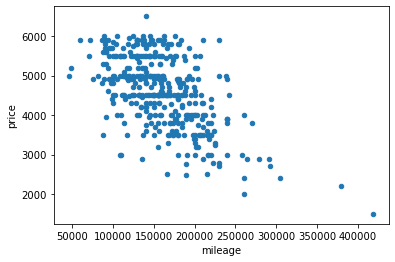

In [19]:
df.plot(x='mileage', y='price', kind='scatter')

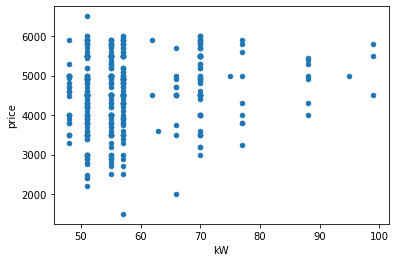

In [20]:
df.plot(x='kW', y='price', kind='scatter')

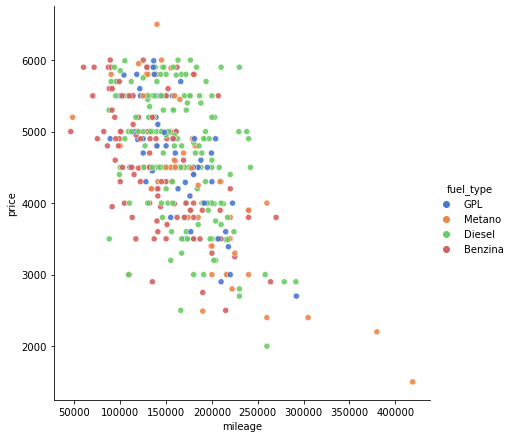

In [21]:
sns.relplot(x="mileage", y="price", hue="fuel_type",# size='mileage',
            sizes=(40, 400), alpha=.9, palette="muted",
            height=6, data=df)

<IPython.core.display.Javascript object>


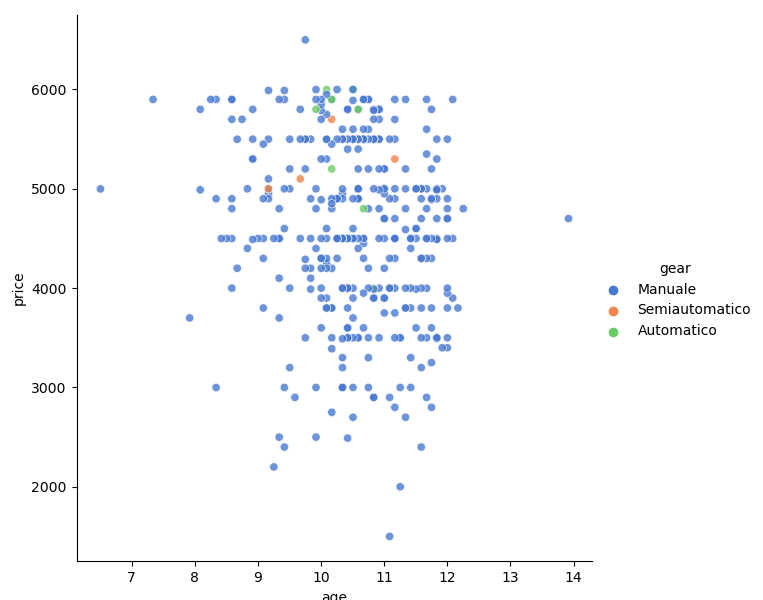

In [43]:
sns.relplot(x="age", y="price", hue='gear',
            sizes=(40, 400), alpha=.8, palette="muted",
            height=6, data=df)

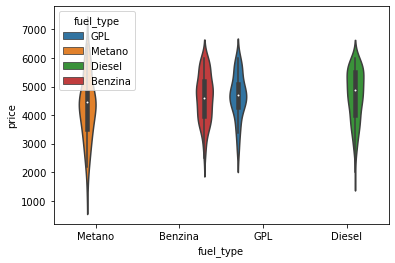

In [23]:
sns.violinplot(x='fuel_type', y='price', hue='fuel_type', data=df, order=['Metano','Benzina','GPL','Diesel'])

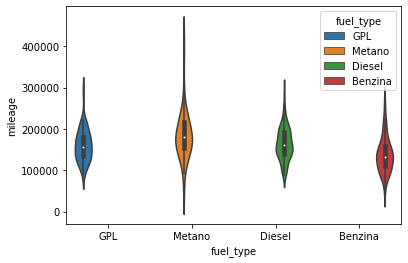

In [24]:
sns.violinplot(x='fuel_type', y='mileage', hue='fuel_type', data=df)#, order=['Metano','Benzina','GPL','Diesel'])

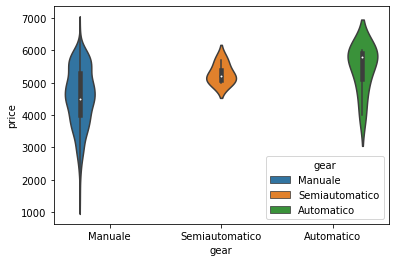

In [25]:
sns.violinplot(x='gear', y='price', hue='gear', data=df)

<IPython.core.display.Javascript object>


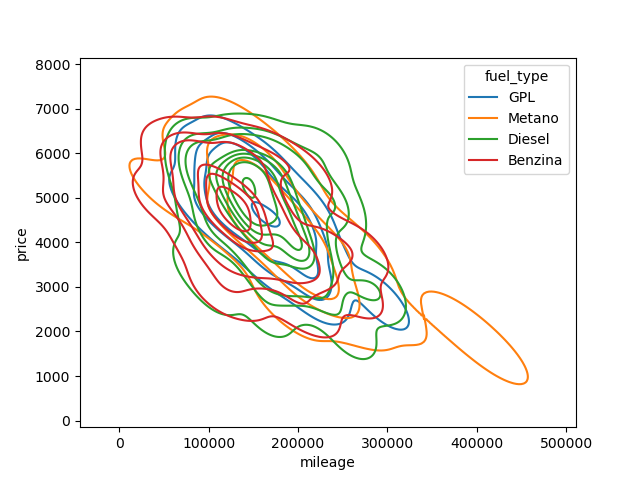

In [37]:
sns.kdeplot( data=df, x='mileage', y='price', hue="fuel_type", thresh=.3, levels=[0.01,0.1,0.2,0.6,0.7,0.8,0.9,0.99])

<IPython.core.display.Javascript object>


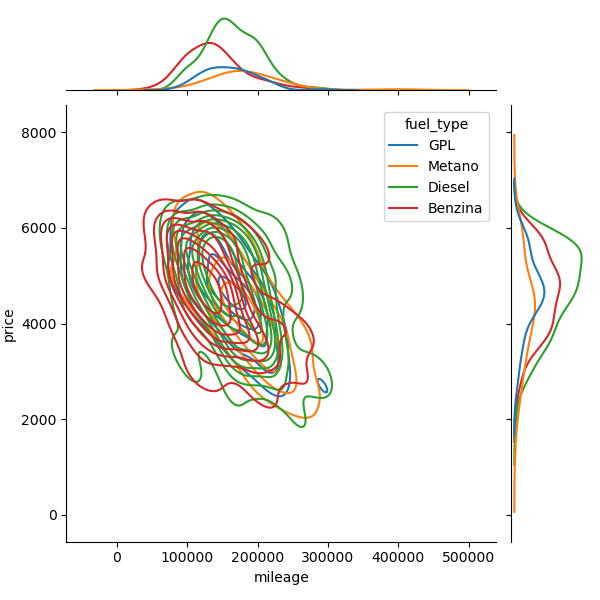

In [40]:
g = sns.jointplot(
    data=df,
    x="mileage", y="price", hue="fuel_type",
    kind="kde",
)